In [1]:
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_cfg_and_parser

In [3]:
cfg, parse = get_cfg_and_parser(WHARDatasetID.KU_HAR)
dataset = PytorchAdapter(cfg, parse, override_cache=False)

Creating config hash...
Checking windowing...
Loading config hash...
Windowing is up-to-date.


Loading windows: 100%|██████████| 23499/23499 [00:13<00:00, 1733.83it/s]


In [7]:
train_loader, val_loader, test_loader = dataset.get_dataloaders()

subject_id
3     111
0      65
21     59
22     57
16     55
     ... 
83      2
84      2
85      2
86      2
87      2
Name: count, Length: 89, dtype: int64
activity_id
8     339
17    188
3     148
15    146
2     130
5     121
12    111
6     105
1      91
11     91
16     88
13     87
10     85
7      57
0      53
14     50
4      35
9      20
Name: count, dtype: int64
train: 18929 | val: 3333 | test: 1237


In [4]:
weights = dataset.get_class_weights(test_loader)
len(weights)

16

In [5]:
dataset.window_index
assert dataset.windows is not None
dataset.windows[6]

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,-6.46350,4.60790,-3.031700,-3.000600,1.23860,1.27220
1,-7.70770,2.77400,-1.877100,-2.644000,1.47180,1.41960
2,-8.44620,1.31210,-0.928120,-2.289100,1.52130,1.35240
3,-8.47970,0.25333,-0.534420,-1.837000,1.41740,1.12150
4,-7.93000,-0.64503,-0.465850,-1.339800,1.15780,0.76906
...,...,...,...,...,...,...
251,0.11040,0.89861,-1.202700,0.172090,-0.59905,0.54487
252,0.30069,1.74750,-0.613470,0.142770,-0.69067,0.46790
253,0.23918,2.07760,0.020141,0.106720,-0.62776,0.39032
254,-0.22012,1.91640,0.413210,0.033420,-0.53063,0.32557


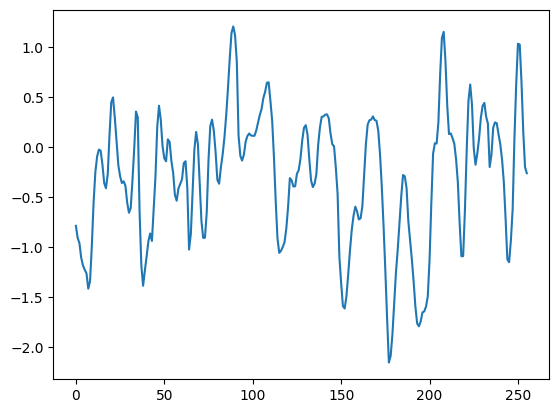

In [30]:
from matplotlib import pyplot as plt

y, x = next(iter(train_loader))
# print(x1.shape)

plt.plot(x[0, :, 0])
plt.show()